# Importimg Dataframe

In [4]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,
    roc_auc_score, roc_curve, balanced_accuracy_score, matthews_corrcoef, log_loss
)
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv(r"D:\ML-Data-Sets\train.csv")
df.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2,...,0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3,...,3,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0,...,3,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1,...,2,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0,...,0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed


In [6]:
df.shape

(59598, 24)

# Handeling Null Value

In [7]:
df.isnull().sum()

Employee ID                 0
Age                         0
Gender                      0
Years at Company            0
Job Role                    0
Monthly Income              0
Work-Life Balance           0
Job Satisfaction            0
Performance Rating          0
Number of Promotions        0
Overtime                    0
Distance from Home          0
Education Level             0
Marital Status              0
Number of Dependents        0
Job Level                   0
Company Size                0
Company Tenure              0
Remote Work                 0
Leadership Opportunities    0
Innovation Opportunities    0
Company Reputation          0
Employee Recognition        0
Attrition                   0
dtype: int64

# Encoding

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
encoder = LabelEncoder()

In [10]:
for column in ['Job Level', 'Company Size', 'Remote Work', 'Leadership Opportunities', 
               'Innovation Opportunities', 'Company Reputation', 'Employee Recognition', 
               'Attrition', 'Gender', 'Job Role', 'Work-Life Balance', 'Job Satisfaction', 
               'Performance Rating', 'Overtime', 'Marital Status', 'Education Level']:
    df[column] = LabelEncoder().fit_transform(df[column])


In [11]:
df.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,1,19,0,5390,0,2,0,2,...,0,1,1,89,0,0,0,0,2,1
1,64756,59,0,4,3,5534,3,0,3,3,...,3,1,1,21,0,0,0,1,1,1
2,30257,24,0,10,2,8159,2,0,3,0,...,3,1,1,74,0,0,0,3,1,1
3,65791,36,0,7,0,3989,2,0,2,1,...,2,1,2,50,1,0,0,2,2,1
4,65026,56,1,41,0,4821,1,3,0,0,...,0,2,1,68,0,0,0,1,2,1


# Splitting DataFrame into x and y

In [12]:
x = df.drop(['Attrition'],axis=1)
x.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Marital Status,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition
0,8410,31,1,19,0,5390,0,2,0,2,...,1,0,1,1,89,0,0,0,0,2
1,64756,59,0,4,3,5534,3,0,3,3,...,0,3,1,1,21,0,0,0,1,1
2,30257,24,0,10,2,8159,2,0,3,0,...,1,3,1,1,74,0,0,0,3,1
3,65791,36,0,7,0,3989,2,0,2,1,...,2,2,1,2,50,1,0,0,2,2
4,65026,56,1,41,0,4821,1,3,0,0,...,0,0,2,1,68,0,0,0,1,2


In [13]:
y = df['Attrition']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Attrition, dtype: int32

# Spilliting train and test set

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state=1)

# Python library used for reading and writing Excel files

In [16]:
# pip install openpyxl

Loggistic Regression model and its evaluation

# Define Models

In [17]:
models = {
    "SVC": SVC(probability=True), 
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier()
}

# Classification Metrics Analysis of Different Classification Models

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.metrics import balanced_accuracy_score, matthews_corrcoef, log_loss
from sklearn.preprocessing import label_binarize
import numpy as np

y_binarized = label_binarize(y_test, classes=np.unique(y_test))

results = {}

for model_name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    y_prob = model.predict_proba(x_test) if hasattr(model, "predict_proba") else None
    
    if y_prob is not None:
        if y_binarized.shape[1] > 1:  
            roc_auc = roc_auc_score(y_binarized, y_prob, multi_class='ovr')
        else: 
            roc_auc = roc_auc_score(y_test, y_prob[:, 1])
    else:
        roc_auc = None  
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)
    log_loss_value = log_loss(y_test, y_prob) if y_prob is not None else None

    conf_matrix = confusion_matrix(y_test, y_pred)
    if conf_matrix.shape == (2, 2):  
        tn, fp, fn, tp = conf_matrix.ravel()
        specificity = tn / (tn + fp) if (tn + fp) > 0 else None
    else:
        specificity = None  

    results[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "Specificity": specificity,
        "Confusion Matrix": conf_matrix,
        "AUC": roc_auc,
        "Balanced Accuracy": balanced_accuracy,
        "MCC": mcc,
        "Logarithmic Loss": log_loss_value
    }

for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value}")
    print("\n")


e:\mlenv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\mlenv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: SVC
Accuracy: 0.5225671140939597
Precision: 0.26128355704697986
Recall: 0.5
F1 Score: 0.34321450217642846
Specificity: 0.0
Confusion Matrix: [[   0 5691]
 [   0 6229]]
AUC: 0.5638599181212324
Balanced Accuracy: 0.5
MCC: 0.0
Logarithmic Loss: 0.6862058517157485


Model: Naive Bayes
Accuracy: 0.7093959731543624
Precision: 0.7103595114077429
Recall: 0.7105632648418772
F1 Score: 0.7093847728636675
Specificity: 0.7364259356879284
Confusion Matrix: [[4191 1500]
 [1964 4265]]
AUC: 0.7841700635661036
Balanced Accuracy: 0.7105632648418772
MCC: 0.42092272693479715
Logarithmic Loss: 0.5841886660065022


Model: Decision Tree
Accuracy: 0.6604026845637584
Precision: 0.6597417961815695
Recall: 0.6597929507033987
F1 Score: 0.6597651177113457
Specificity: 0.6462836056931998
Confusion Matrix: [[3678 2013]
 [2035 4194]]
AUC: 0.6597929507033987
Balanced Accuracy: 0.6597929507033987
MCC: 0.31953474279028826
Logarithmic Loss: 12.240327929458575


Model: Logistic Regression
Accuracy: 0.569043624161073

# Export Excel File

In [19]:
import pandas as pd

results_df = pd.DataFrame(results).T 

file_path = 'D:\ML-Data-Sets'  
file_name = 'Model_Evaluation_Results.xlsx'

full_file_path = file_path + file_name

results_df.to_excel(full_file_path, index=True)

print(f"Model evaluation results have been saved to {full_file_path}")


<>:5: SyntaxWarning: invalid escape sequence '\M'
<>:5: SyntaxWarning: invalid escape sequence '\M'
C:\Users\ASUS\AppData\Local\Temp\ipykernel_19348\1752018491.py:5: SyntaxWarning: invalid escape sequence '\M'
  file_path = 'D:\ML-Data-Sets'


Model evaluation results have been saved to D:\ML-Data-SetsModel_Evaluation_Results.xlsx


# ROC curve for Specific Model

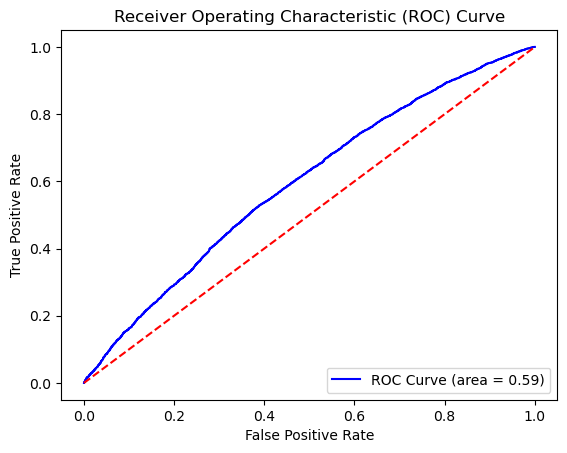

In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

if len(np.unique(y_test)) == 2:  
    y_prob = models["Logistic Regression"].predict_proba(x_test)[:, 1] 

    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = roc_auc_score(y_test, y_prob)

    plt.figure()
    plt.plot(fpr, tpr, color='blue', label='ROC Curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='red', linestyle='--') 
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()
else:
    print("ROC curve is only applicable for binary classification.")
